In [412]:
import cv2, string, os, sys
print(os.listdir('../../'))
print(os.getcwd())
sys.path.append("../")
sys.path.append("../src/network")
sys.path.append("../src")
print(os.getcwd())

import numpy as np
import random
from src.data.preproc import resize
import matplotlib.pyplot as plt


['data', 'handwriting-recognition', 'htr_self_supervised', 'manuscript-dating-sn', 'mnist_pipeline', 'Paper-ext', 'self-supervised-mnist', 'Thesis', 'ws-siamese']
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments


In [413]:
def img_padding(img, input_height):
        print(len(img)/input_height)
        if len(img)/input_height <= 0.5:
            
            desired_height = input_height
            delta_h = int(((desired_height - len(img))/2) * (1 - (len(img)/input_height))) # * 1 - ratio other small images are too zoomed int
        else:
            delta_h = 0
        new_im = np.pad(
                    img,
                    pad_width=((delta_h, delta_h), (0, 0)),
                    mode="constant",
                    constant_values=(255),
        )
        return new_im


In [414]:
main_path = '../raw/iam/words/a01'
form_dirs = random.choices(os.listdir(main_path), k=5)
img_paths = []

for dir in form_dirs:
    imgs = random.choices(os.listdir(main_path + '/' + dir), k = 2)
    img_paths += [main_path + '/' + dir + '/'+ img for img in imgs]

img_paths

['../raw/iam/words/a01/a01-063x/a01-063x-05-01.png',
 '../raw/iam/words/a01/a01-063x/a01-063x-02-00.png',
 '../raw/iam/words/a01/a01-087/a01-087-02-03.png',
 '../raw/iam/words/a01/a01-087/a01-087-06-06.png',
 '../raw/iam/words/a01/a01-063x/a01-063x-03-02.png',
 '../raw/iam/words/a01/a01-063x/a01-063x-07-00.png',
 '../raw/iam/words/a01/a01-043x/a01-043x-05-04.png',
 '../raw/iam/words/a01/a01-043x/a01-043x-04-00.png',
 '../raw/iam/words/a01/a01-030u/a01-030u-08-04.png',
 '../raw/iam/words/a01/a01-030u/a01-030u-03-02.png']

../raw/iam/words/a01/a01-063x/a01-063x-05-01.png
1.578125
../raw/iam/words/a01/a01-063x/a01-063x-02-00.png
1.6875
../raw/iam/words/a01/a01-087/a01-087-02-03.png
1.28125
../raw/iam/words/a01/a01-087/a01-087-06-06.png
1.234375
../raw/iam/words/a01/a01-063x/a01-063x-03-02.png
1.515625
../raw/iam/words/a01/a01-063x/a01-063x-07-00.png
2.40625
../raw/iam/words/a01/a01-043x/a01-043x-05-04.png
1.8125
../raw/iam/words/a01/a01-043x/a01-043x-04-00.png
1.578125
../raw/iam/words/a01/a01-030u/a01-030u-08-04.png
1.4375
../raw/iam/words/a01/a01-030u/a01-030u-03-02.png
1.15625


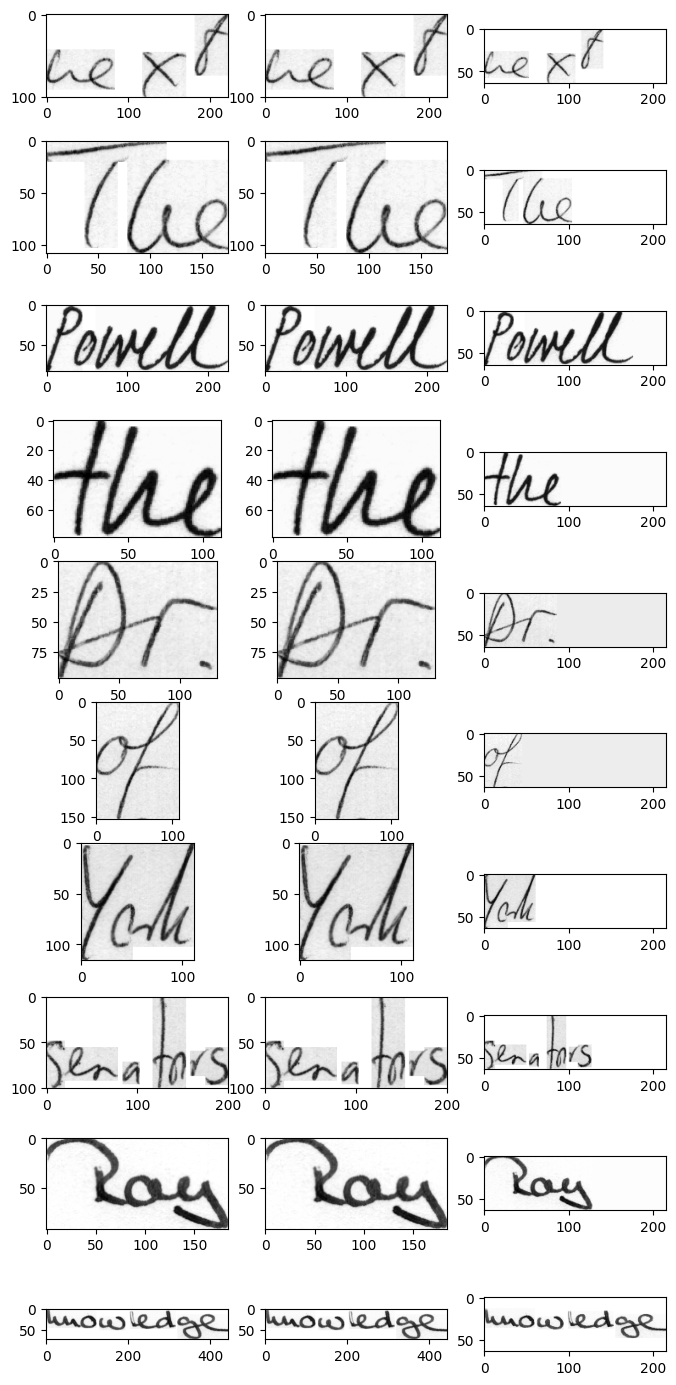

In [415]:
fig = plt.figure(figsize=(8,18))
columns = 3
rows = 10

ax = []
INPUT_SIZE = (216, 64, 1)
i = 0
idx = 0
while i < rows*columns:
    print(img_paths[idx])
    img = cv2.imread(img_paths[idx], cv2.IMREAD_GRAYSCALE)
    
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns,i+1) )
    # ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, cmap='gray')
    img = img_padding(img, INPUT_SIZE[1])
    ax.append( fig.add_subplot(rows, columns, i + 2 ))
    # ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, cmap='gray')

    img = resize(img, INPUT_SIZE)
    ax.append( fig.add_subplot(rows, columns, i + 3 ))
    # ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, cmap='gray')
    i += 3
    idx += 1
plt.show()

0.453125
0.46875
0.5
0.484375


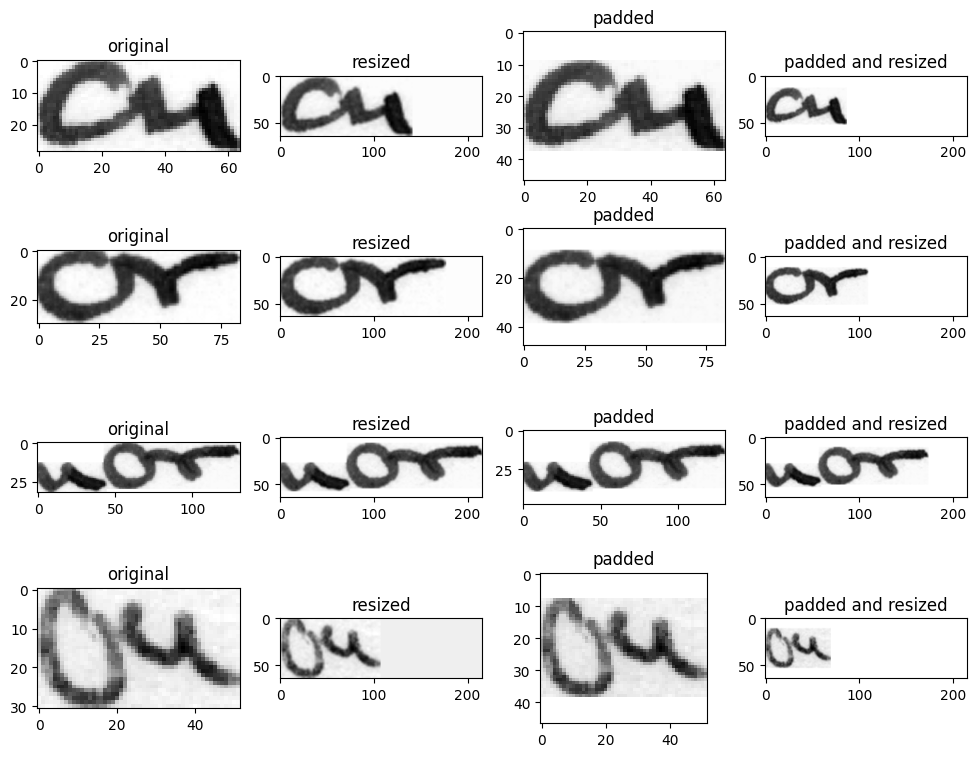

In [418]:
affected_imgs = ['../raw/iam/words/a01/a01-063u/a01-063u-00-05.png', '../raw/iam/words/a01/a01-072u/a01-072u-07-02.png', '../raw/iam/words/a01/a01-113u/a01-113u-05-00.png', '../raw/iam/words/a01/a01-072x/a01-072x-00-07.png']

fig = plt.figure(figsize=(12,9))
columns = 4
rows = 4

ax = []
INPUT_SIZE = (216, 64, 1)
i = 0
idx = 0
while i < rows*columns:
    img = cv2.imread(affected_imgs[idx % 10], cv2.IMREAD_GRAYSCALE)
    img_pad = img_padding(img, INPUT_SIZE[1])
    img_res = resize(img, INPUT_SIZE)
    img_res_pad = resize(img_pad, INPUT_SIZE)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns,i+1) )
    ax[-1].set_title("original")  # set title
    plt.imshow(img, cmap='gray')
    
    ax.append( fig.add_subplot(rows, columns, i + 2 ))
    ax[-1].set_title("resized")  # set title
    plt.imshow(img_res, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 3 ))
    ax[-1].set_title("padded")  # set title
    plt.imshow(img_pad, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 4 ))
    ax[-1].set_title("padded and resized")  # set title
    plt.imshow(img_res_pad, cmap='gray')
    i += 4
    idx += 1
plt.show()